In [1]:
import pickle
import seaborn as sns

In [2]:
with open("measure-ours.pkl", "rb") as pkl:
    data = pickle.load(pkl)

data = data.assign(rpp_minus_alpha=data.rpp - data.alpha)
data

,key,protocol,maximum_height,maximum_size,model_hum,protocol_hum,time,n_states,n_actions,n_transitions,...,vi_time,vi_max_value,ss_reachable,ss_nonzero,ss_time,pe_iter,ptrev,rpp,vi_steady_value,rpp_minus_alpha
0,par-2-ms-6,parallel-2,0,6,"sm.SelfishMining(Parallel(k=2), alpha=0.125, g...",Parallel(k=2),2.628455,1658,7,6006,...,2.534164,25.565994,103,103,0.051100,2,0.101575,0.238208,21.858624,3.820767e-02
1,eth-3-ms-5,ethereum-wp-3,0,5,sm.SelfishMining(EthereumWhitepaper(horizon=3)...,EthereumWhitepaper(horizon=3),2.471665,1124,6,3082,...,2.400122,36.593355,81,81,0.050819,2,0.116667,0.350000,34.025578,-4.940492e-14
2,eth-2-ms-6,ethereum-wp-2,0,6,sm.SelfishMining(EthereumWhitepaper(horizon=2)...,EthereumWhitepaper(horizon=2),4.553663,2987,6,10176,...,4.416580,18.096128,34,34,0.051178,2,0.075000,0.150000,13.878862,-1.218470e-14
3,par-2-ms-6,parallel-2,0,6,"sm.SelfishMining(Parallel(k=2), alpha=0.125, g...",Parallel(k=2),3.108744,1658,7,6006,...,3.015454,37.658187,117,117,0.051037,2,0.156924,0.362697,34.448730,6.269681e-02
4,byz-2-ms-6,ethereum-bz-2,0,6,"sm.SelfishMining(EthereumByzantium(horizon=2),...",EthereumByzantium(horizon=2),5.704856,2987,6,10176,...,5.583566,41.618049,34,34,0.049121,2,0.200000,0.400000,38.622145,-6.661338e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,par-4-ms-7,parallel-4,0,7,"sm.SelfishMining(Parallel(k=4), alpha=0.125, g...",Parallel(k=4),2.718855,2429,10,10285,...,2.677333,14.292549,177,177,0.004412,2,0.048367,0.108188,8.933976,8.188392e-03
212,eth-2-ms-6,ethereum-wp-2,0,6,sm.SelfishMining(EthereumWhitepaper(horizon=2)...,EthereumWhitepaper(horizon=2),3.554854,2987,6,10176,...,3.503712,13.388146,34,34,0.001127,2,0.050000,0.100000,8.926505,-5.467848e-15
213,par-3-ms-6,parallel-3,0,6,"sm.SelfishMining(Parallel(k=3), alpha=0.125, g...",Parallel(k=3),1.785454,1271,8,4777,...,1.765562,24.899401,117,117,0.002405,2,0.095927,0.229120,20.982350,2.912000e-02
214,eth-3-ms-5,ethereum-wp-3,0,5,sm.SelfishMining(EthereumWhitepaper(horizon=3)...,EthereumWhitepaper(horizon=3),2.244275,1124,6,3082,...,2.232316,41.403253,81,81,0.001440,2,0.133333,0.400000,39.032542,-4.929390e-14


In [3]:
data[(data.ss_reachable - data.ss_nonzero) != 0].drop(
    columns=["model_hum", "protocol_hum"]
)

,key,protocol,maximum_height,maximum_size,time,n_states,n_actions,n_transitions,alpha,gamma,...,vi_time,vi_max_value,ss_reachable,ss_nonzero,ss_time,pe_iter,ptrev,rpp,vi_steady_value,rpp_minus_alpha
14,par-2-ms-6,parallel-2,0,6,1.685083,1658,7,6006,0.1,0.5,...,1.628440,13.377851,72,71,0.001966,2,0.051485,0.1087,8.967002,8.700000e-03
79,eth-2-ms-6,ethereum-wp-2,0,6,5.308071,2987,6,10176,0.2,0.5,...,5.225790,22.787133,34,33,0.001410,2,0.100000,0.2000,18.813913,-6.522560e-15
130,byz-2-ms-6,ethereum-bz-2,0,6,4.858931,2987,6,10176,0.2,1.0,...,4.809819,22.787133,34,33,0.001344,2,0.100000,0.2000,18.813913,-6.522560e-15
166,eth-2-ms-6,ethereum-wp-2,0,6,4.666657,2987,6,10176,0.2,1.0,...,4.604546,22.787133,34,33,0.001454,2,0.100000,0.2000,18.813913,-6.522560e-15
176,par-2-ms-6,parallel-2,0,6,1.638903,1658,7,6006,0.1,0.0,...,1.609574,13.377851,72,71,0.001829,2,0.051485,0.1087,8.967002,8.700000e-03
188,byz-2-ms-6,ethereum-bz-2,0,6,4.583463,2987,6,10176,0.2,0.5,...,4.535082,22.787133,34,33,0.001441,2,0.100000,0.2000,18.813913,-6.522560e-15
190,eth-2-ms-6,ethereum-wp-2,0,6,4.616434,2987,6,10176,0.2,0.0,...,4.558459,22.787133,34,33,0.001409,2,0.100000,0.2000,18.813913,-6.522560e-15
204,byz-2-ms-6,ethereum-bz-2,0,6,4.628692,2987,6,10176,0.2,0.0,...,4.579272,22.787133,34,33,0.001355,2,0.100000,0.2000,18.813913,-6.522560e-15


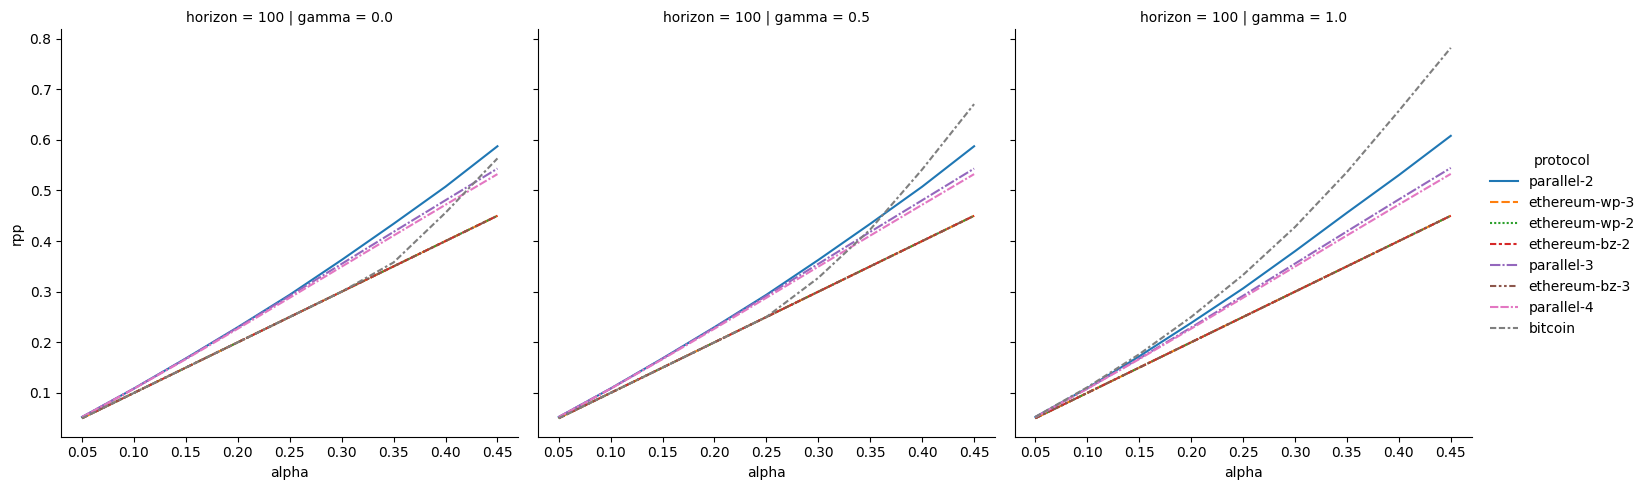

In [4]:
# Compare model w.r.t. reward
sns.relplot(
    data,
    kind="line",
    x="alpha",
    y="rpp",
    col="gamma",
    row="horizon",
    hue="protocol",
    style="protocol",
)

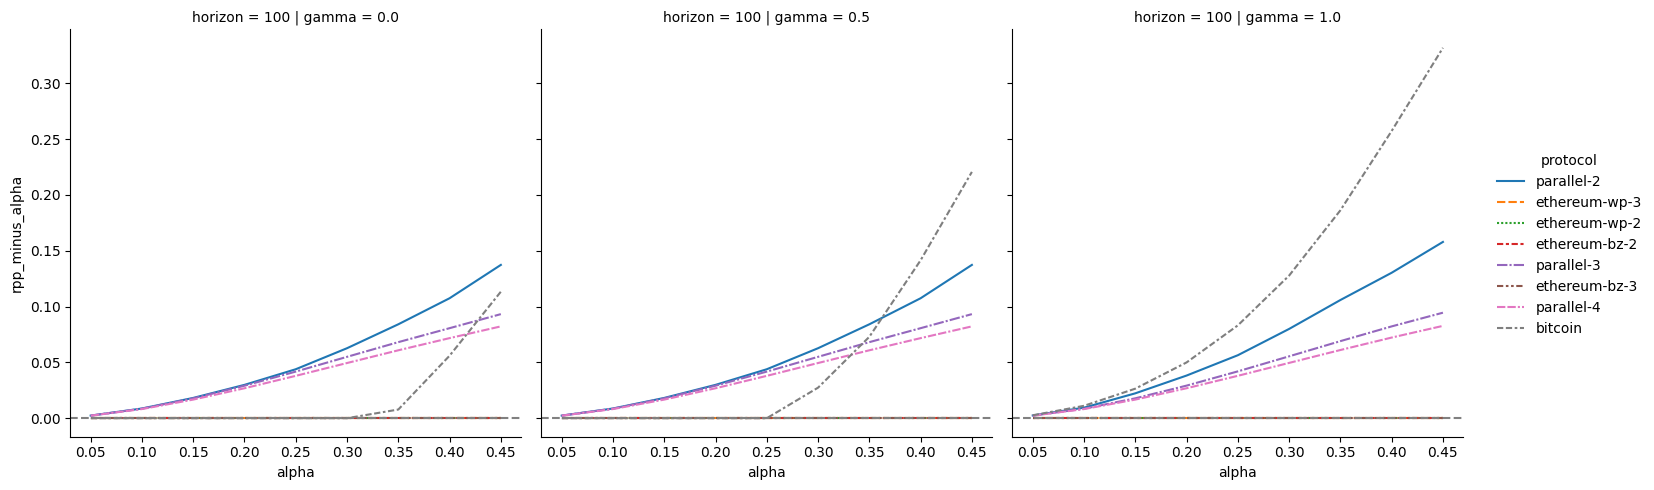

In [5]:
# Compare model w.r.t. reward
sns.relplot(
    data,
    kind="line",
    x="alpha",
    y="rpp_minus_alpha",
    col="gamma",
    row="horizon",
    hue="protocol",
    style="protocol",
).refline(y=0)

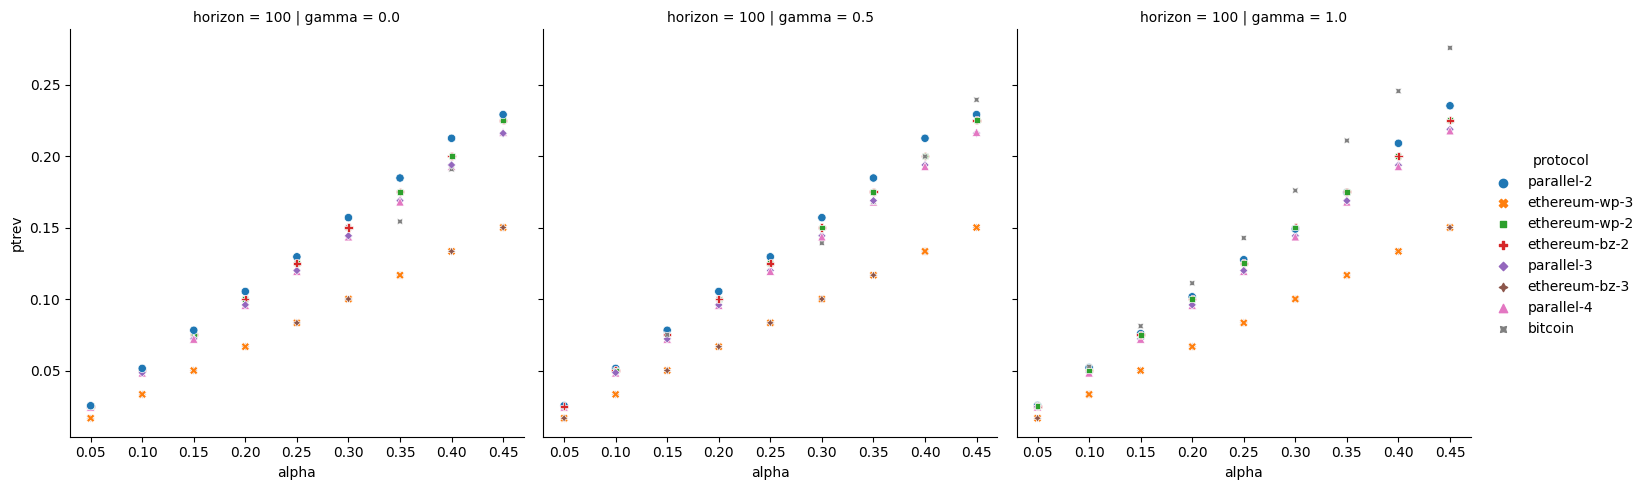

In [6]:
# Compare model w.r.t. reward
sns.relplot(
    data,
    x="alpha",
    y="ptrev",
    col="gamma",
    row="horizon",
    hue="protocol",
    style="protocol",
)

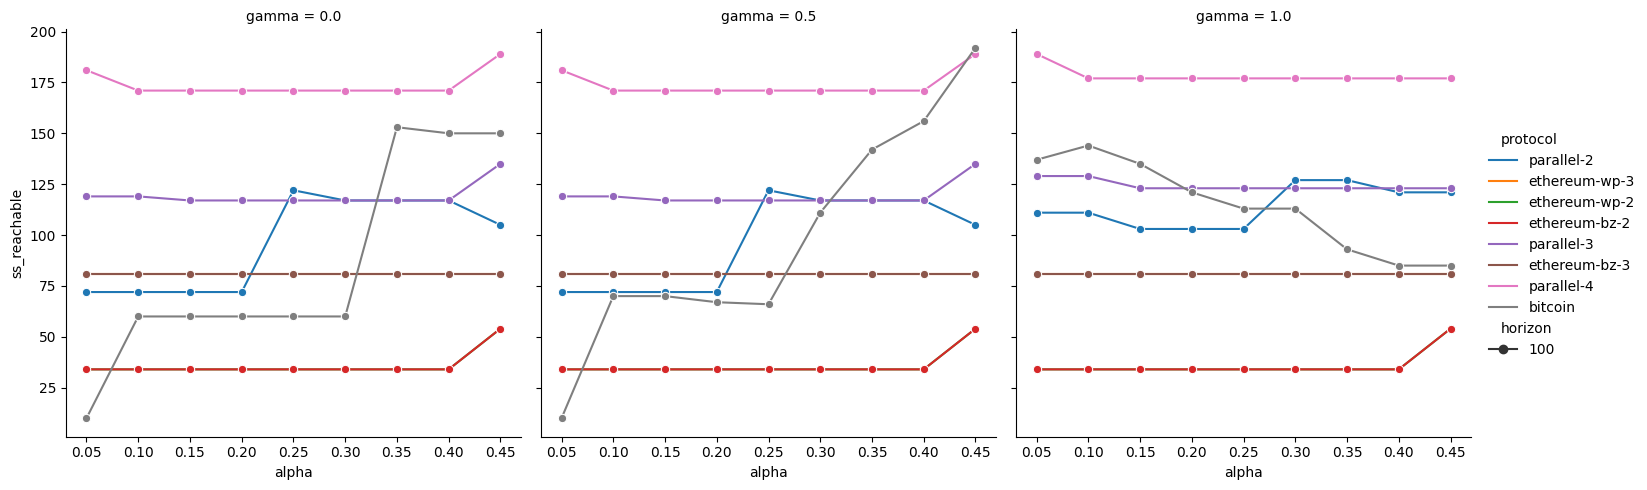

In [7]:
# Compare policy size
sns.relplot(
    data,
    x="alpha",
    y="ss_reachable",
    col="gamma",
    hue="protocol",
    style="horizon",
    kind="line",
    markers=True,
)